In [24]:
import joblib

In [26]:
data= joblib.load(r"C:/Users/MAJID KHAN/Data Science/Projects/Patient Symptom Clustering for Respiratory and Allergy Diseases/Notebooks/EDA/EDA_data.pkl")

In [28]:
scaler= joblib.load(r"C:/Users/MAJID KHAN/Data Science/Projects/Patient Symptom Clustering for Respiratory and Allergy Diseases/Notebooks/EDA/scaler.pkl")

In [31]:
data.head(3)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [33]:
X=data.copy()

In [35]:
X.head(2)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1


In [37]:
X_scaled= scaler.fit_transform(X)
X_scaled

array([[-1.04268011, -1.04011563,  0.96054999, ...,  2.01607916,
        -1.0396136 ,  2.01638587],
       [-1.04268011, -1.04011563,  0.96054999, ...,  2.01607916,
         0.96189585,  2.01638587],
       [-1.04268011,  0.96143156,  0.96054999, ..., -0.49601227,
        -1.0396136 ,  2.01638587],
       ...,
       [-1.04268011, -1.04011563,  0.96054999, ..., -0.49601227,
         0.96189585, -0.49593682],
       [-1.04268011, -1.04011563, -1.04107023, ..., -0.49601227,
        -1.0396136 , -0.49593682],
       [ 0.95906692,  0.96143156, -1.04107023, ..., -0.49601227,
        -1.0396136 , -0.49593682]])

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: Decide number of clusters (k)
# Try different k values to find optimal one
inertia = []
sil_scores = []
K = range(2, 10)  # test from 2 to 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

In [41]:
inertia

[673148.4014482382,
 643831.7256683093,
 627007.3861552576,
 611922.4271833862,
 596232.3611303034,
 577172.7121938923,
 566653.013887201,
 559010.6107192815]

---
- From **k=2 → 4**, inertia drops significantly **(673k → 627k).**
- After **k=4**, the drop becomes smaller (627k → **611k → 596k).**
- By **k=7 to 9**, the reduction is very small **(577k → 559k).**

👉 This suggests that the **“elbow”** point is around **k=4 or k=5.**
That means **4–5 clusters best balance** compactness vs simplicity.

---

In [43]:
sil_scores

[0.1827585111094941,
 0.09922868246091385,
 0.06614337629054258,
 0.060906270174969745,
 0.06571508206726362,
 0.07518881938873732,
 0.07979473076603086,
 0.07508165000459353]

---
## What is Silhouette Score?

- Range = -1 to 1
    - **+1** → clusters are very dense & well separated.
    - **0** → overlapping clusters.
    - **Negative** → points might be in the wrong cluster.

- General rule of thumb:
    - **0.5** = Good structure
    - **0.25** – 0.5 = Weak structure
    - **<0.25** = Very weak (clusters may not be natural)

👉 Unlike inertia, **higher is always better here**.

---

- **Best score = 0.182 (k=2)**
    - → The dataset is best separated into **2 clusters**.

- But **0.18 is still quite low** → meaning clusters are **weakly separated** (symptoms overlap strongly).

- From k=3 to k=9, the score keeps dropping and stays **<0.1**, which is extremely weak.

👉 This suggests that your dataset **does not form very clean clusters** (which makes sense: symptoms of diseases like flu, COVID, and allergies overlap a lot).

---
- Inertia said k=4 looked good (elbow).
- Silhouette says k=2 is the only semi-decent choice.

**📌 What this means:**

- If you want compact, balanced clusters → go with **k=4** (Elbow).
- If you want mathematically best-separated clusters → go with **k=2** (Silhouette).

---

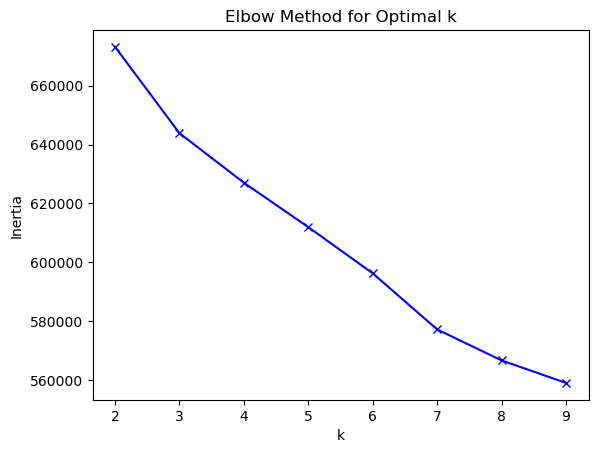

In [45]:
# Step 2: Plot Elbow Method
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

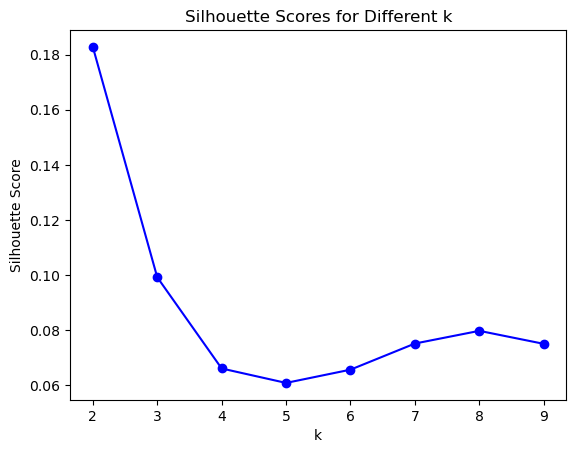

In [47]:
# Step 3: Plot Silhouette Score
plt.plot(K, sil_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In [56]:
# So

In [58]:
model= KMeans(n_clusters=4, random_state=42, n_init=10)

In [62]:
labels=model.fit_predict(X_scaled)

In [64]:
model.fit_predict(X_scaled)

array([0, 0, 2, ..., 3, 3, 3])

In [66]:
data['label']= labels

In [68]:
data.head(2)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,label
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,0


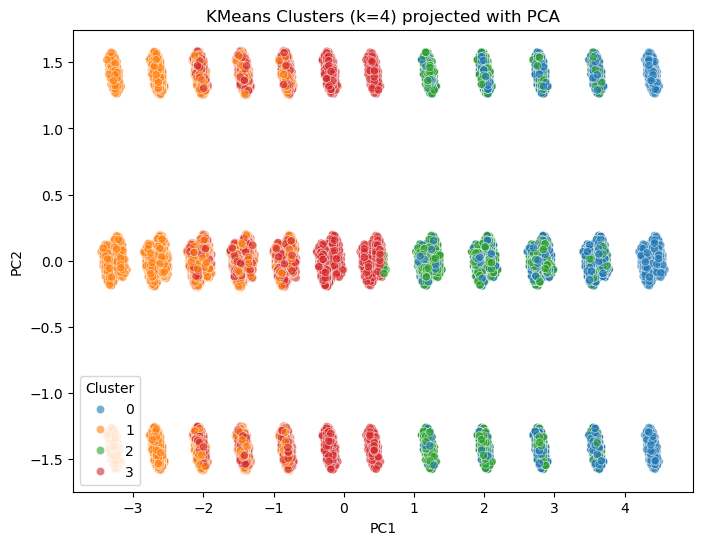


Cluster Centers (mean symptom intensity per cluster):
      COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0 -0.041807     -0.039342  -0.040260    -0.039197   -0.038714    -0.037699   
1  0.019135      0.013884   0.017268     0.014622    0.019552     0.016413   
2 -0.042458     -0.039733  -0.040651    -0.040109   -0.038844    -0.037830   
3  0.033874      0.036331   0.033764     0.035650    0.029027     0.031195   

      FEVER    NAUSEA  VOMITING  DIARRHEA  SHORTNESS_OF_BREATH  \
0 -0.683584 -0.691034 -0.691111 -0.689474            -0.690311   
1  0.421288  0.819285  0.060219  0.813180             0.811379   
2 -0.683584 -0.691034 -0.691111 -0.689474            -0.690311   
3  0.426325 -0.007444  0.838569 -0.002685             0.000419   

   DIFFICULTY_BREATHING  LOSS_OF_TASTE  LOSS_OF_SMELL  ITCHY_NOSE  ITCHY_EYES  \
0             -0.691301       0.112273       0.111929    0.760033    0.760033   
1              0.815487      -0.040831      -0.036548   -0.49

In [74]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (k=4) projected with PCA")
plt.legend(title="Cluster")
plt.show()

# =========================
# Cluster Centers (Symptom Importance)
# =========================
cluster_centers = pd.DataFrame(model.cluster_centers_, columns=data.columns[:-1])  # exclude 'Cluster'
print("\nCluster Centers (mean symptom intensity per cluster):")
print(cluster_centers)

In [77]:
# Now lets do Interpretation of Clusters


In [79]:
# Get cluster centers (scaled)
cluster_centers = pd.DataFrame(model.cluster_centers_, columns=data.columns[:-1])

# Sort top symptoms per cluster
for i in range(4):
    print(f"\nCluster {i} - Top Symptoms:")
    print(cluster_centers.iloc[i].sort_values(ascending=False).head(5))



Cluster 0 - Top Symptoms:
ITCHY_INNER_EAR    2.016079
PINK_EYE           0.760225
ITCHY_MOUTH        0.760033
ITCHY_EYES         0.760033
ITCHY_NOSE         0.760033
Name: 0, dtype: float64

Cluster 1 - Top Symptoms:
NAUSEA                  0.819285
DIFFICULTY_BREATHING    0.815487
DIARRHEA                0.813180
SHORTNESS_OF_BREATH     0.811379
FEVER                   0.421288
Name: 1, dtype: float64

Cluster 2 - Top Symptoms:
ITCHY_MOUTH      0.843247
ITCHY_NOSE       0.843247
ITCHY_EYES       0.843247
PINK_EYE         0.842791
LOSS_OF_TASTE    0.112928
Name: 2, dtype: float64

Cluster 3 - Top Symptoms:
VOMITING        0.838569
FEVER           0.426325
MUSCLE_ACHES    0.036331
SORE_THROAT     0.035650
SNEEZING        0.034831
Name: 3, dtype: float64


In [83]:
cluster_names = {
    0: "Allergy related",
    1: "COVID-like ",
    2: "Allergy varient ",
    3: "Flu-Like"
}

data["LABEL"] = [cluster_names[label] for label in labels]


In [85]:
data.head(3)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,label,LABEL
0,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,Allergy related
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,0,Allergy related
2,0,1,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,2,Allergy varient


In [89]:
data.drop(columns='label', inplace=True, axis=1)

In [91]:
data.head(20)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,LABEL
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,Allergy related
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,Allergy related
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,Allergy varient
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,Allergy varient
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,Allergy related
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,Allergy related
6,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,Allergy varient
7,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,Allergy varient
8,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Flu-Like
9,1,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Flu-Like


In [94]:
joblib.dump(model, "kmeans_symptom_model.pkl")


['kmeans_symptom_model.pkl']

In [96]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']